# CAPM - Capital Asset Pricing Model 

## simple linear regression으로 CAPM을 Modeling
- market portfolio 는 S&P500 사용
- Apple 단일 주식 portfolio 사용

### CAPM 공식 이용
### $$ r_i = r_f + \beta * (r_m - r_f )$$
$r_i$ : 자산 𝑖 의 기대 수익률입니다. 자산 투자 시 예상되는 수익률입니다.  
$r_f$ : 무위험 수익률 (Risk-free rate)입니다.  
𝛽: 자산의 베타 계수입니다. 이 값은 자산이 시장 전체의 변동에 대해 얼마나 민감하게 반응하는지를 나타냅니다.  
$r_m$ : 시장 수익률 (Market return). 시장 전체(예: 주식 시장)의 평균적인 수익률을 나타냅니다.  
$(r_m - r_f )$ : **시장 위험 프리미엄 (Market risk premium)**입니다. 이는 시장 전체의 기대 수익률에서 무위험 수익률을 뺀 값으로, 시장에 투자할 때 추가적으로 기대되는 수익률을 의미합니다.  

- CAPM 공식은 베타 계수가 클수록 자산의 변동성(시장에 대한 민감도)이 크기 때문에, 추가적인 위험을 감수함으로써 더 높은 기대 수익률을 가질 수 있다는 의미입니다.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stocks_df = pd.read_csv('data/stock.csv')
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


날짜를 기준으로 데이터를 정렬하고 날짜를 인덱스로 설정

In [3]:
# stocks_df 데이터프레임을 'Date' 열을 기준으로 정렬합니다.
# set_index('Date')는 'Date' 열을 인덱스로 설정합니다.
stocks_df = stocks_df.sort_values(by=['Date']).set_index('Date')

stocks_df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


price를 시작일 price로 normalize하는 함수

In [4]:
# 각 열의 첫 번째 값에 대한 비율로 나누어 각 값을 스케일링
def normalize(df):
    # 데이터프레임을 복사하여 원본 데이터가 변경되지 않도록 합니다.
    x = df.copy()
    
    # 데이터프레임의 각 열에 대해 반복 작업을 수행합니다.
    for col in x.columns:
        # 각 열의 첫 번째 값으로 모든 값을 나누어 정규화합니다.
        # x[col][0]은 해당 열의 첫 번째 값을 의미하며, 각 값은 그 값에 대한 비율로 변경됩니다.
        x[col] = x[col] / x[col][0]
    
    # 정규화된 데이터프레임을 반환
    return x

- 일일 수익률 계산

In [5]:
daily_returns = stocks_df.pct_change()
daily_returns.dropna(inplace=True)

- 다음 중 일일 평균 수익률이 더 높은 것은 무엇입니까?
   - S&P500 or Google
   - S&P500 or Amazon

In [6]:
# 각 열(자산)의 평균 일일 수익률을 계산하고 평균 수익률을 내림차순으로 정렬합니다.
daily_returns.mean().sort_values(ascending=False)

TSLA     0.002385
AMZN     0.001512
AAPL     0.001077
GOOG     0.000844
BA       0.000659
MGM      0.000647
sp500    0.000493
T        0.000082
IBM     -0.000061
dtype: float64

### 단일 주식에 대한 베타 계산
- 단일 주식의 일일 수익률

In [7]:
stock = 'AAPL'
stock_name = 'Apple'

In [8]:
daily_returns[stock]

Date
2012-01-13   -0.003749
2012-01-17    0.011648
2012-01-18    0.010384
2012-01-19   -0.003169
2012-01-20   -0.017417
                ...   
2020-08-05    0.003625
2020-08-06    0.034889
2020-08-07   -0.024495
2020-08-10    0.014535
2020-08-11   -0.029740
Name: AAPL, Length: 2158, dtype: float64

S&P500 (Market)의 일일 수익률

In [9]:
daily_returns['sp500']

Date
2012-01-13   -0.004948
2012-01-17    0.003553
2012-01-18    0.011108
2012-01-19    0.004939
2012-01-20    0.000669
                ...   
2020-08-05    0.006430
2020-08-06    0.006428
2020-08-07    0.000633
2020-08-10    0.002742
2020-08-11   -0.007969
Name: sp500, Length: 2158, dtype: float64

선택한 주식과 S&P500(시장) 사이의 산점도를 플로팅합니다.

<Axes: xlabel='sp500', ylabel='AAPL'>

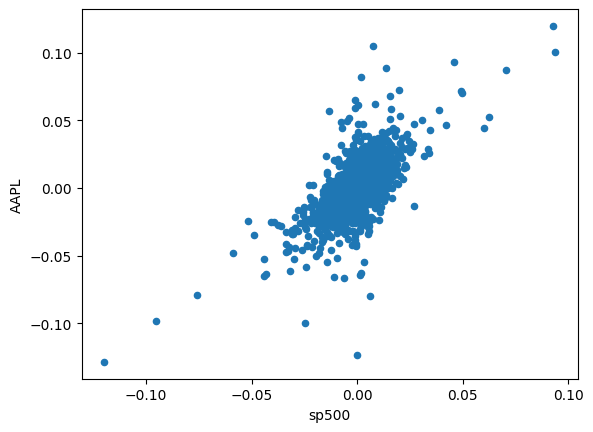

In [10]:
# daily_returns 데이터프레임에서 산점도(scatter plot)를 생성합니다.
# x='sp500'은 x축에 S&P 500 지수의 일일 수익률을 설정
# y=stock은 y축에 특정 주식의 일일 수익률을 설정
daily_returns.plot(kind='scatter', x='sp500', y=stock)

### Linear Regression을 이용한 BETA 계산

In [11]:
# daily_returns 데이터프레임에서 S&P 500 지수의 수익률을 가져와 X 변수에 저장
# 2차원 배열로 변환하기 위해 reshape(-1, 1)을 사용
X = daily_returns['sp500'].values.reshape(-1, 1)

# daily_returns 데이터프레임에서 Apple(AAPL) 주식의 수익률을 y 변수에 저장
y = daily_returns['AAPL']

X.shape, y.shape

((2158, 1), (2158,))

In [12]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

lr.coef_[0], lr.intercept_

(1.1128913172512678, 0.000528366115486677)

- 알파는 시장을 이길 수 있는 전략의 능력을 나타냅니다(S&P500).  즉, 특정 주식이 시장과 무관한 요인으로 인해 주식이 얻는 초과 수익을 의미합니다.

- 예를 들어 양수 0.00175 알파는 특정 주식 또는 포트폴리오의 수익률이 벤치마크 S&P500 지수를 0.17% 초과했음을 의미합니다.

In [13]:
beta = lr.coef_[0]
alpha = lr.intercept_
print(f"{stock} 주식의 BETA = {beta:.3f}, alpha = {alpha:.3f}")

AAPL 주식의 BETA = 1.113, alpha = 0.001


### 증권시장선 Line plot

<img src="https://i.imgur.com/tOn1h2J.png" width=450 />

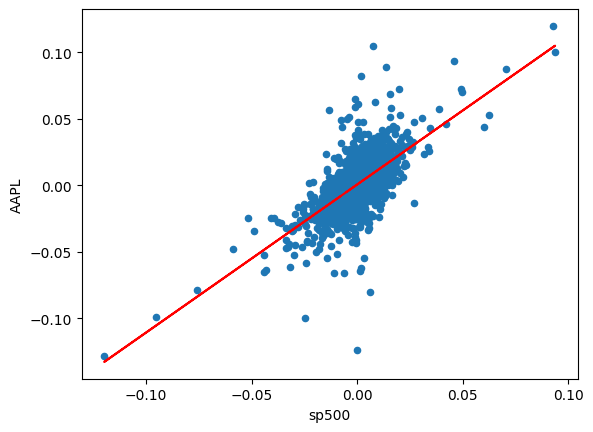

In [14]:
# daily_returns 데이터프레임에서 S&P 500 지수와 특정 주식의 일일 수익률을 산점도로 시각화합니다.
# x축에 S&P 500 지수의 일일 수익률을 설정하고,
# y축에 특정 주식의 일일 수익률을 설정합니다.
daily_returns.plot(kind='scatter', x='sp500', y=stock)

# 회귀선(선형 관계)을 추가하여 주식 수익률과 S&P 500 지수 간의 관계를 시각화합니다.
# beta * daily_returns['sp500'] + alpha는 회귀 직선의 방정식입니다.
plt.plot(daily_returns['sp500'], beta * daily_returns['sp500'] + alpha, 'r')

## beta를 구한 개별 주식에 CAPM 공식 적용
- 개별 주식의 기대 수익률 계산
### $ r_i = r_f + \beta * (r_m - r_f )$   

In [15]:
print(f"{stock} 주식의 BETA = {beta}")

AAPL 주식의 BETA = 1.1128913172512678


S&P500의 일일 평균 수익률

In [16]:
daily_returns['sp500'].mean()

0.0004933885924478228

S&P500의 연간 수익률

In [17]:
rm = daily_returns['sp500'].mean() * 252
rm

0.12433392529685133

개별 주식의 연간 수익률

In [18]:
rf = 0.025  # 무위험 수익률

R_i = rf + beta * (rm - rf)
R_i

0.1355478629713519

In [19]:
print(
f"""
CAPM 공식에 따르면,
단순히 마켓 인덱스에 투자할 때 연 {rm * 100:.2f}%의 수익이 기대되나, 
{stock_name} 주식에 투자할 때는 연 {R_i * 100:.2f}%의 수익이 기대된다. 
공격적 투자.
""")


CAPM 공식에 따르면,
단순히 마켓 인덱스에 투자할 때 연 12.43%의 수익이 기대되나, 
Apple 주식에 투자할 때는 연 13.55%의 수익이 기대된다. 
공격적 투자.



- AT&T의 기대 수익률 계산

In [20]:
stock = 'T' 

X = daily_returns['sp500'].values.reshape(-1, 1)
y = daily_returns[stock]

lr = LinearRegression()
lr.fit(X, y)

beta = lr.coef_[0]

ER_AT = rf + beta * (rm - rf)
ER_AT

0.09896701474644304

In [21]:
print(
f"""
CAPM 공식에 따르면,
단순히 마켓 인덱스에 투자할 때 연 {rm * 100:.2f}%의 수익이 기대되나, 
{stock} 주식에 투자할 때는 연 {ER_AT * 100:.2f}%의 수익이 기대된다. 
방어적 투자.
""")


CAPM 공식에 따르면,
단순히 마켓 인덱스에 투자할 때 연 12.43%의 수익이 기대되나, 
T 주식에 투자할 때는 연 9.90%의 수익이 기대된다. 
방어적 투자.



## 모든 주식에 대한 베타 계산

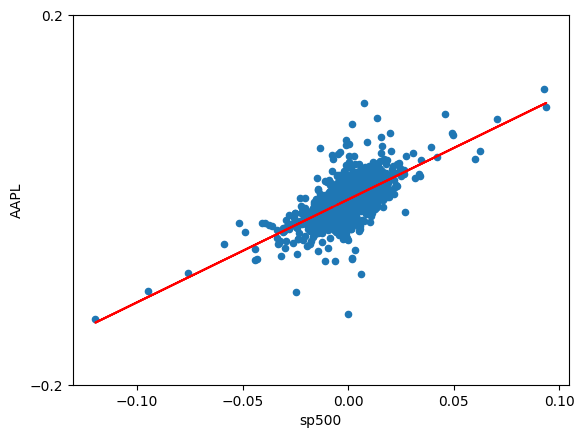

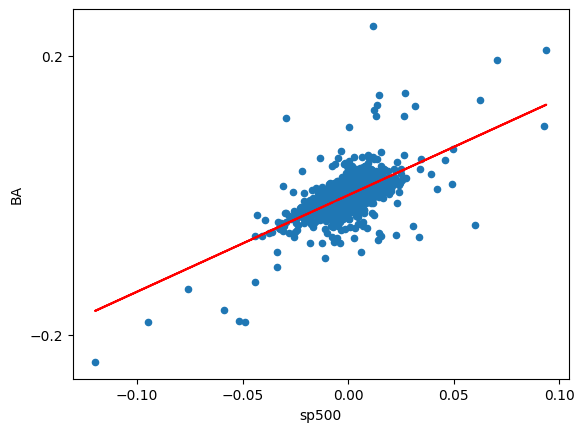

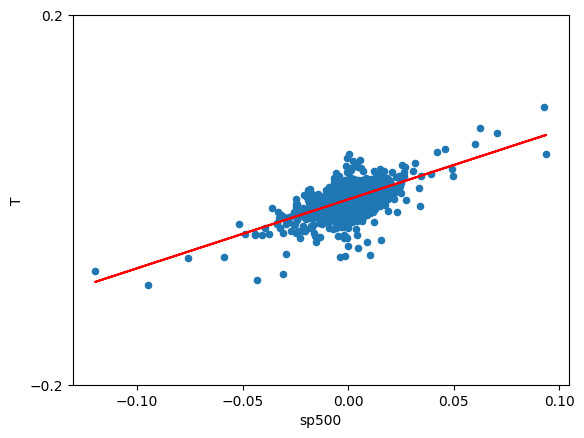

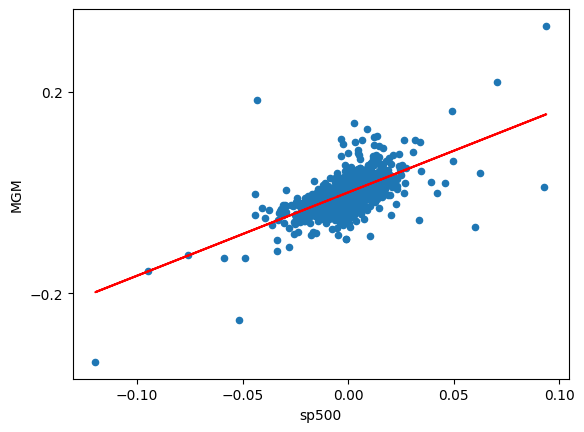

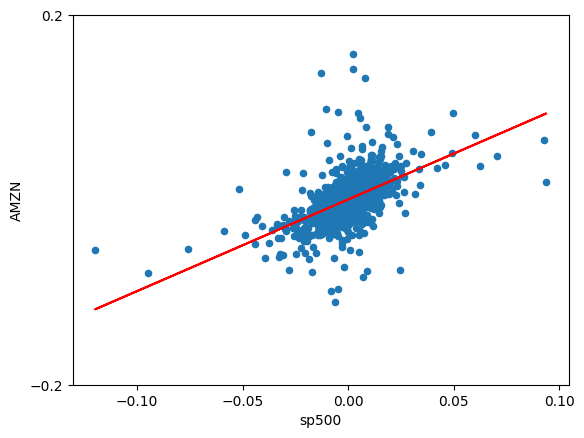

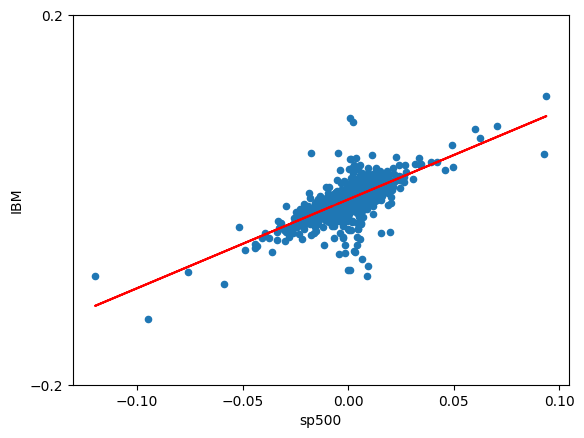

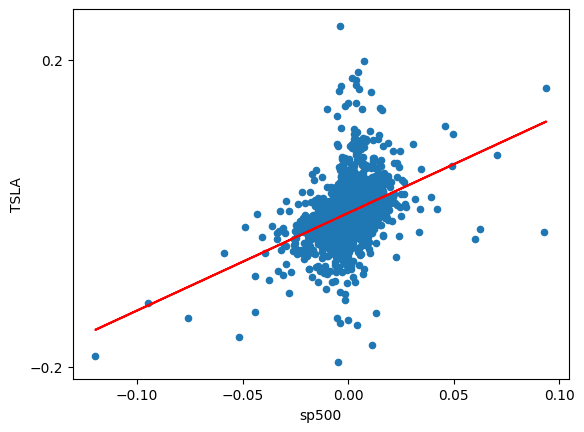

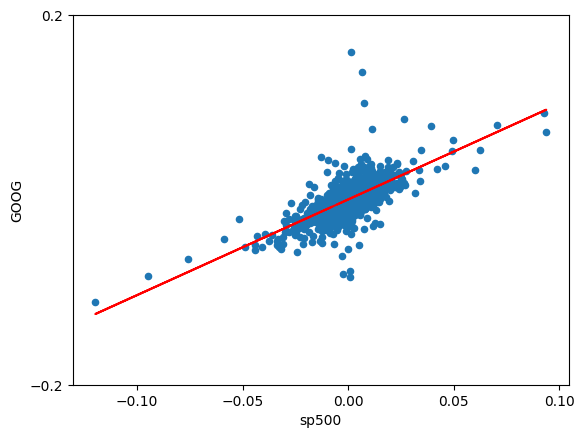

In [22]:
# 빈 딕셔너리를 생성하여 각 주식의 베타와 알파 값을 저장할 준비를 합니다.
betas = {}
alphas = {}

# S&P 500 지수의 일일 수익률 데이터를 X 변수에 저장합니다.
X = daily_returns['sp500'].values.reshape(-1, 1)

for col in daily_returns.columns[:-1]:  # S&P 500을 제외한 다른 자산들에 대해 반복
    
    # 주식(col)의 일일 수익률 데이터를 y 변수에 저장
    y = daily_returns[col]
    
    # 선형 회귀 모델을 생성
    lr = LinearRegression()
    
    # X(S&P 500 지수)와 y(해당 주식 수익률)를 사용해 선형 회귀 모델을 학습
    lr.fit(X, y)
    
    # 회귀 모델의 계수(coef_, 베타)와 절편(intercept_, 알파)을 저장
    beta = lr.coef_[0]  # S&P 500 지수와 주식 간의 상관관계를 나타내는 베타 값
    
    # 베타와 알파 값을 각각 betas와 alphas 딕셔너리에 저장
    betas[col] = beta
    
    # x축은 S&P 500 지수의 수익률, y축은 해당 주식의 수익률을 표시
    daily_returns.plot(kind='scatter', x='sp500', y=col)
    
    # 선형 회귀선(베타와 알파를 사용하여 계산된)을 빨간색으로 그래프에 추가
    plt.plot(daily_returns['sp500'], 
             beta * daily_returns['sp500'] + alpha, 'r')
    
    # y축 눈금을 -0.2에서 0.2까지로 설정하여 그래프를 일관성 있게 시각화
    plt.yticks([-0.2, 0.2])

In [23]:
betas

{'AAPL': 1.1128913172512678,
 'BA': 1.3828672486978595,
 'T': 0.7446299391209865,
 'MGM': 1.6535680574526659,
 'AMZN': 0.9917324469003794,
 'IBM': 0.9604160257868408,
 'TSLA': 1.2686113556558827,
 'GOOG': 1.0348810754991697}

## CAPM 공식을 적용하여 포트폴리오 수익률 계산

모든 주식 목록을 얻습니다.

In [24]:
stocks = list(betas.keys())
stocks

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [25]:
# 주식별로 예상 수익률(Expected Returns)을 저장할 딕셔너리 초기화
ERs = {}

# 무위험 수익률 설정
rf = 0.025

# S&P 500 지수의 연간 평균 수익률을 계산합니다.
rm = daily_returns['sp500'].mean() * 252

# 각 주식에 대해 예상 수익률(ER, Expected Return)을 계산합니다.
for stock in stocks:
    # 예상 수익률(ER) = rf + 베타 * (시장 수익률 - 무위험 수익률)
    ERs[stock] = rf + betas[stock] * (rm - rf)

In [26]:
ERs

{'AAPL': 0.1355478629713519,
 'BA': 0.1623656319776155,
 'T': 0.09896701474644304,
 'MGM': 0.1892554058922627,
 'AMZN': 0.12351267679486588,
 'IBM': 0.1204018937594089,
 'TSLA': 0.15101614563345875,
 'GOOG': 0.1277987994447597}

In [27]:
print("CAPM 을 이용한 주식의 연간 기대 수익률 :")
for stock in stocks:
    print(f"{stock:<10} : {ERs[stock] * 100:.2f}%")

CAPM 을 이용한 주식의 연간 기대 수익률 :
AAPL       : 13.55%
BA         : 16.24%
T          : 9.90%
MGM        : 18.93%
AMZN       : 12.35%
IBM        : 12.04%
TSLA       : 15.10%
GOOG       : 12.78%


### Portfolio 의 기대 수익 계산

- 위 주식들로 구성된 포트폴리오에서 동일한 가중치를 가정합니다.

In [28]:
# np.ones(len(stocks))는 주식 개수만큼 1로 이루어진 배열을 생성합니다.
# 이 두 값의 곱을 통해 각 주식의 비중을 동일하게 1/주식 개수로 설정합니다.
portfolio_weights = 1 / len(stocks) * np.ones(len(stocks))

portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

- 위 포트폴리오 기대 수익률 계산

In [29]:
# portfolio_weights는 각 주식의 포트폴리오 내 비중을 나타냅니다.
# 두 리스트를 요소별로 곱하여 가중합을 구한 뒤, * 100을 통해 백분율로 변환합니다.
ER_portfolio = sum(list(ERs.values()) * portfolio_weights) * 100

# 계산된 포트폴리오의 기대 수익률을 출력
ER_portfolio

13.86081789025208

- Apple 50%, MGM 50% 구성된 포트폴리오의 기대 수익률

In [30]:
ER_portfolio = (0.5 * ERs['AAPL'] + 0.5 * ERs['MGM']) * 100
ER_portfolio

16.24016344318073